In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [71]:
training_data_file = '../data/training_data/2005-2015_training_data.csv'

In [72]:
data = pd.read_csv(training_data_file)

/home/siderealyear/anaconda3/envs/wildfire/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12168110 entries, 0 to 12168109
Data columns (total 17 columns):
weather_bin_time       object
lat                    float64
lon                    float64
air.sfc                float64
air.2m                 float64
apcp                   float64
crain                  float64
rhum.2m                float64
dpt.2m                 float64
pres.sfc               float64
uwnd.10m               float64
vwnd.10m               float64
veg                    float64
fire_discovery_time    float64
size                   float64
size_class             object
ignition               float64
dtypes: float64(15), object(2)
memory usage: 1.5+ GB


In [75]:
data.describe()

,lat,lon,air.sfc,air.2m,apcp,crain,rhum.2m,dpt.2m,pres.sfc,uwnd.10m,vwnd.10m,veg,fire_discovery_time,size,ignition
count,1.216811e+07,1.216811e+07,1.197856e+07,1.197856e+07,1.197856e+07,1.197856e+07,1.197856e+07,1.197856e+07,1.197856e+07,1.197856e+07,1.197856e+07,1.197856e+07,110217.000000,189550.000000,189550.0
mean,3.712547e+01,-1.195300e+02,2.889527e+02,2.879476e+02,1.620509e-01,5.757771e-02,4.786626e+01,2.741508e+02,9.153190e+04,1.059241e+00,1.075154e-01,3.063439e+01,1383.752742,67.242725,1.0
std,2.556212e+00,2.502004e+00,1.392015e+01,1.023177e+01,9.353815e-01,2.329432e-01,2.640591e+01,7.587456e+00,6.966894e+03,2.732453e+00,3.306149e+00,2.275454e+01,490.324275,2029.960435,0.0
min,3.268389e+01,-1.243408e+02,2.422595e+02,2.465075e+02,0.000000e+00,0.000000e+00,1.000000e+00,1.921768e+02,6.624355e+04,-2.030144e+01,-2.000592e+01,0.000000e+00,0.000000,0.001000,1.0
25%,3.499029e+01,-1.214709e+02,2.788525e+02,2.807825e+02,0.000000e+00,0.000000e+00,2.521898e+01,2.691620e+02,8.715947e+04,-7.443695e-01,-2.100845e+00,8.200000e+00,1115.000000,0.100000,1.0
50%,3.683767e+01,-1.199051e+02,2.865459e+02,2.869761e+02,0.000000e+00,0.000000e+00,4.379562e+01,2.746586e+02,9.232952e+04,1.038500e+00,6.468201e-02,3.055000e+01,1428.000000,0.250000,1.0
75%,3.925970e+01,-1.174117e+02,2.974096e+02,2.947501e+02,0.000000e+00,0.000000e+00,6.971560e+01,2.797777e+02,9.708650e+04,2.748856e+00,2.251846e+00,4.360000e+01,1715.000000,1.000000,1.0
max,4.197182e+01,-1.143645e+02,3.384141e+02,3.229702e+02,4.148438e+01,1.000000e+00,1.000312e+02,2.993494e+02,1.035852e+05,2.156605e+01,2.987953e+01,8.370000e+01,2359.000000,315578.800000,1.0


First let's check the distribution of all of the weather variables over the whole dataset.

In [94]:
data['air.sfc'].isnull().sum()

189550

ValueError: autodetected range of [nan, nan] is not finite

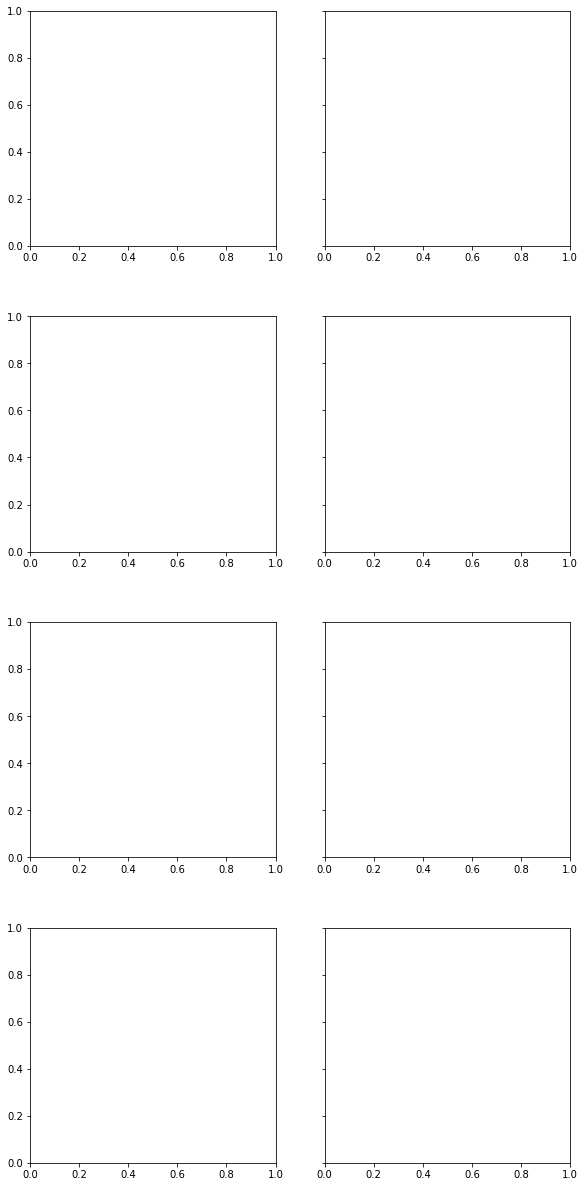

In [92]:
left  = 0.125  # the left side of the subplots of the figure
right = 0.5    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.3   # the amount of height reserved for white space between subplots

fig, ax = plt.subplots(4, 2, sharey='row', figsize=(20, 20))
fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)



values, base = np.histogram(data['air.sfc'], bins=40)
cumulative = np.cumsum(values) / len(data)

ax[0,0].plot(base[:-1], cumulative, c='blue')
ax[0,0].tick_params(labelsize=12)
ax[0,0].set_title('Surface air temperature', fontsize=18)
ax[0,0].set_xlabel('Temp. (K)', fontsize=14)
ax[0,0].set_ylabel('Fraction of observations', fontsize=15)

# values, base = np.histogram(data['air.2m'], bins=40)
# cumulative = np.cumsum(values)

# ax[0,1].plot(base[:-1], cumulative, c='blue')
# ax[0,1].tick_params(labelsize=12)
# ax[0,1].set_title('Air temperature at 2 meters', fontsize=18)
# ax[0,1].set_xlabel('Temp. (K)', fontsize=14)

# values, base = np.histogram(data['apcp'], bins=40)
# cumulative = np.cumsum(values) / len(data)

# ax[1,0].plot(base[:-1], cumulative, c='blue')
# ax[1,0].tick_params(labelsize=12)
# ax[1,0].set_title('Acumulated precipitation', fontsize=18)
# ax[1,0].set_xlabel('Precipitation (in)', fontsize=14)
# ax[1,0].set_ylabel('Fraction of observations', fontsize=15)

# values, base = np.histogram(data['pres.sfc'], bins=40)
# cumulative = np.cumsum(values) / len(data)

# ax[1,1].plot(base[:-1], cumulative, c='blue')
# ax[1,1].tick_params(labelsize=12)
# ax[1,1].set_title('Surface pressure', fontsize=18)
# ax[1,1].set_xlabel('Pressure (Pa)', fontsize=14)

# values, base = np.histogram(data['vwnd.10m'], bins=40)
# cumulative = np.cumsum(values) / len(data)

# ax[2,0].plot(base[:-1], cumulative, c='blue')
# ax[2,0].tick_params(labelsize=12)
# ax[2,0].set_title('North-south component of wind', fontsize=18)
# ax[2,0].set_xlabel('Wind speed (mph)', fontsize=14)
# ax[2,0].set_ylabel('Fraction of observations', fontsize=15)

# values, base = np.histogram(data['uwnd.10m'], bins=40)
# cumulative = np.cumsum(values) / len(data)

# ax[2,1].plot(base[:-1], cumulative, c='blue')
# ax[2,1].tick_params(labelsize=12)
# ax[2,1].set_title('East-west component of wind', fontsize=18)
# ax[2,1].set_xlabel('Wind speed (mph)', fontsize=14)

# values, base = np.histogram(data['rhum.2m'], bins=40)
# cumulative = np.cumsum(values) / len(data)

# ax[3,0].plot(base[:-1], cumulative, c='blue')
# ax[3,0].tick_params(labelsize=12)
# ax[3,0].set_title('Relative humidity', fontsize=18)
# ax[3,0].set_xlabel('Humidity (%)', fontsize=14)
# ax[3,0].set_ylabel('Fraction of observations', fontsize=15)

# values, base = np.histogram(data['veg'], bins=40)
# cumulative = np.cumsum(values) / len(data)

# ax[3,1].plot(base[:-1], cumulative, c='blue')
# ax[3,1].tick_params(labelsize=12)
# ax[3,1].set_title('Vegitation', fontsize=18)
# ax[3,1].set_xlabel('Cover (%)', fontsize=14)

#plt.tight_layout()
plt.show()

In [78]:
data.head()

,weather_bin_time,lat,lon,air.sfc,air.2m,apcp,crain,rhum.2m,dpt.2m,pres.sfc,uwnd.10m,vwnd.10m,veg,fire_discovery_time,size,size_class,ignition
0,2005-01-01 00:00:00,40.29749,-124.3408,284.87308,283.24860,1.406250,1.0,77.472340,279.43463,98986.180,5.984521,3.811234,0.0,NaN,NaN,NaN,NaN
1,2005-01-01 03:00:00,40.29749,-124.3408,284.71484,282.99774,0.781250,1.0,78.829380,279.48016,99001.150,3.470335,2.581940,0.0,NaN,NaN,NaN,NaN
2,2005-01-01 06:00:00,40.29749,-124.3408,284.62878,282.55124,0.234375,1.0,77.277170,278.75513,99287.914,2.909558,1.104767,0.0,NaN,NaN,NaN,NaN
3,2005-01-01 09:00:00,40.29749,-124.3408,284.64642,282.59882,1.875000,1.0,79.537100,279.22357,99256.030,2.127604,4.751480,0.0,NaN,NaN,NaN,NaN
4,2005-01-01 12:00:00,40.29749,-124.3408,284.74457,282.18732,5.335938,1.0,80.818474,279.02075,99279.950,2.699432,6.547989,0.0,NaN,NaN,NaN,NaN


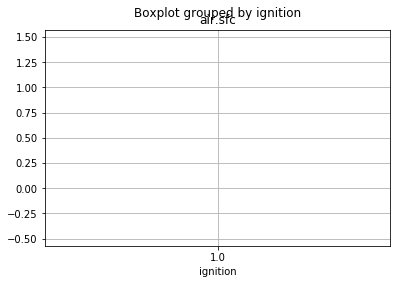

In [80]:
boxplot = data.boxplot(column=['air.sfc'], by='ignition')